# mnist資料集 - 手寫辨識
- 訓練資料 : __60000__筆
- 測試資料 : __10000__筆
- 每張圖片都是28*28 = __784__ pixels


In [16]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()

## 檢視資料

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#### 顯示第0筆手寫圖片

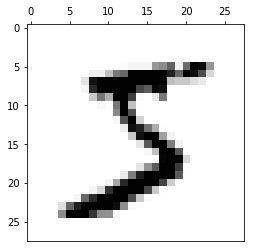

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
imgplot = ax.imshow(X_train[0], cmap=mpl.cm.Greys)
imgplot.set_interpolation('nearest')
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
pyplot.show()

In [6]:
X_train.shape
# X_test.shape
# y_train.shape
# len(X_train[0])

(60000, 28, 28)

### 資料預處理
1. 將28*28的灰階影像，轉成784維的向量(因為都是numpy array，所以可以直接reshape)
2. 將每個pixel值都正規化到0-1之間
3. label都做one-hot encoding

In [19]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### 切割 Training 和 Validation Data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

In [21]:
X_train[0].shape

(784,)

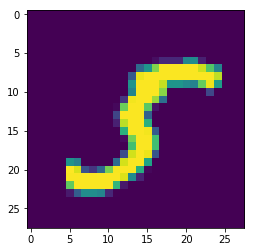

In [22]:
plt.imshow(X_train[0].reshape(28, 28))

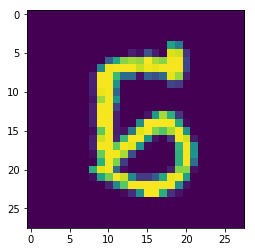

In [25]:
plt.imshow(X_val[0].reshape(28, 28))

In [24]:
# one-hot encoding結果
import numpy as np
print(np.asarray(range(10)))
print(Y_train[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 1 0 0 0 0]


### 訓練

In [27]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

nb_classes = 10

# FC@512+relu -> FC@512+relu -> FC@nb_classes+softmax

In [29]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

In [31]:
network_history = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_val, Y_val))

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 6s - loss: 1.7552 - acc: 0.7027 - val_loss: 1.6372 - val_acc: 0.7253